In [1]:
import earthkit

In [2]:
temperature = earthkit.data.from_source(
    'cds', 'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '2m_temperature',
        'year': '1990',
        'month': [f"{month:2d}" for month in range(1, 13)],
        'day': '01',
        'time': '00:00',
    },
)

In [3]:
temperature.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19900101,0,0,an,0,regular_ll
1,ecmf,2t,surface,0,19900201,0,0,an,0,regular_ll
2,ecmf,2t,surface,0,19900301,0,0,an,0,regular_ll
3,ecmf,2t,surface,0,19900401,0,0,an,0,regular_ll
4,ecmf,2t,surface,0,19900501,0,0,an,0,regular_ll
5,ecmf,2t,surface,0,19900601,0,0,an,0,regular_ll
6,ecmf,2t,surface,0,19900701,0,0,an,0,regular_ll
7,ecmf,2t,surface,0,19900801,0,0,an,0,regular_ll
8,ecmf,2t,surface,0,19900901,0,0,an,0,regular_ll
9,ecmf,2t,surface,0,19901001,0,0,an,0,regular_ll


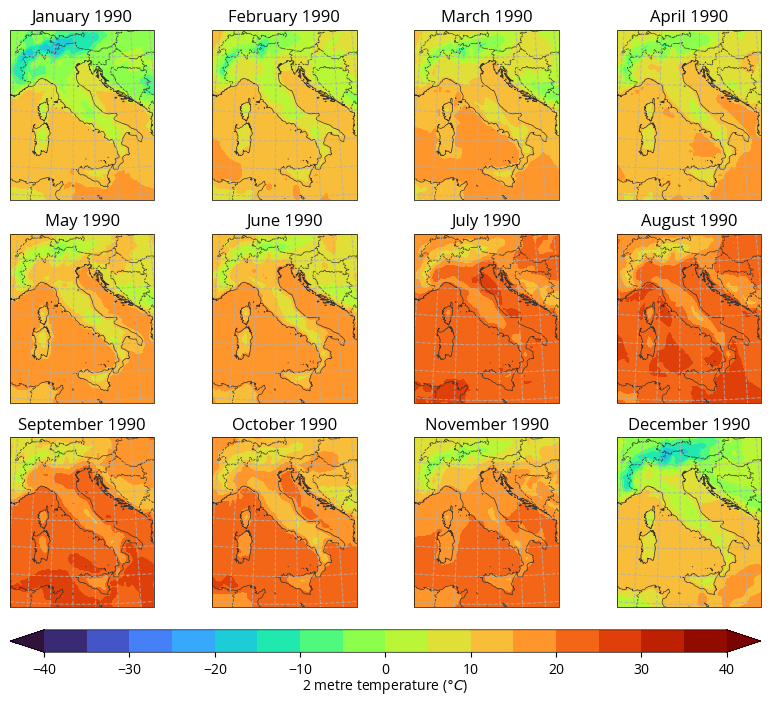

In [ ]:
chart = earthkit.maps.Chart(domain="Italy")

levels = range(-40, 41, 5)

chart.shaded_contour(
    temperature, units="celsius",
    levels=levels, extend="both", cmap="turbo",
)
chart.legend(location="bottom")

chart.subplot_titles("{time:%B %Y}")

chart.coastlines()
chart.borders()
chart.gridlines(draw_labels=False)
chart.show()

In [11]:
pressure = earthkit.data.from_source(
    'cds', 'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'mean_sea_level_pressure',
        'year': '1990',
        'month': [f"{month:2d}" for month in range(1, 13)],
        'day': '01',
        'time': '00:00',
#         "format": "netcdf",
    },
)

2023-07-07 14:35:17,500 INFO Welcome to the CDS
2023-07-07 14:35:17,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-07-07 14:35:17,652 INFO Request is queued
2023-07-07 14:35:18,716 INFO Request is running
2023-07-07 14:35:22,631 INFO Request is completed
2023-07-07 14:35:22,633 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.mars.internal-1688736918.243535-739-18-f6437d13-8887-4480-80e5-33e436e27a52.grib to /var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-retriever-3c0386237566ff22f77831d1113802b23fc14a7c96897b601b60f85bb6d0a8be.cache.tmp (23.8M)
2023-07-07 14:35:25,426 INFO Download rate 8.5M/s                                                                                                                 


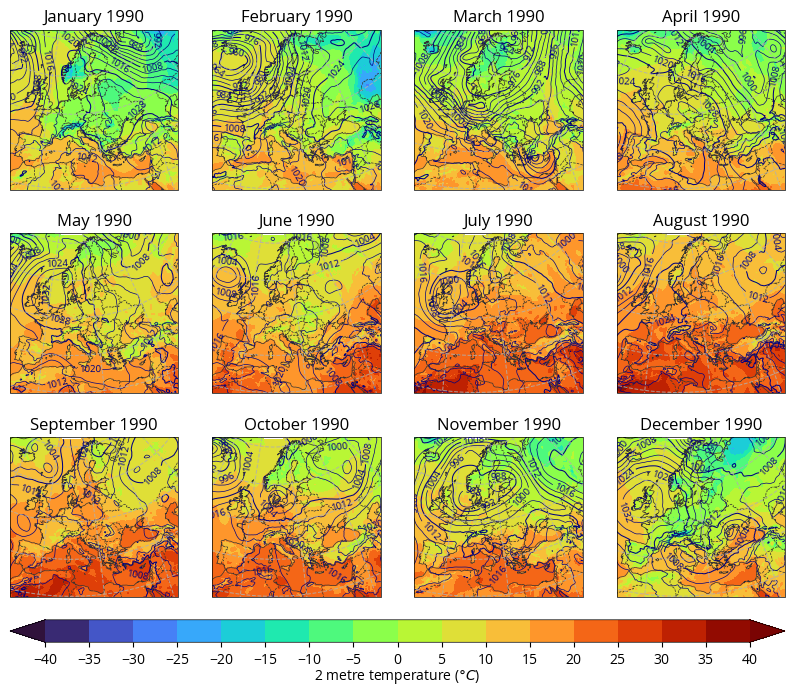

In [20]:
chart = earthkit.maps.Chart(domain="Europe")

pressure_levels=range(960, 1041, 4)

chart.shaded_contour(temperature, units="celsius", levels=levels, extend="both", cmap="turbo")
chart.contour(pressure, units="hPa", levels=pressure_levels, labels=True, colors="navy", linewidths=[.75, .5, .5, .5])
chart.legend(location="bottom", ticks=range(-40, 41, 5))

chart.subplot_titles("{time:%B %Y}")

chart.coastlines(resolution="medium")
chart.borders()
chart.gridlines(draw_labels=False)

chart.show()